In [2]:
from __future__ import annotations

In [3]:
from IPython.display import display, HTML
display(HTML('<style>.container { width:100% !important; }</style>'))

In [4]:
import os
import datetime
import numpy as np
import sklearn.metrics
import tensorflow as tf
import sklearn.datasets
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import seaborn as sns
sns.set_style('dark')
sns.set(rc={'figure.figsize': (10, 10), 'axes.grid': False})

In [5]:
rng = np.random.default_rng()
print(rng)

Generator(PCG64)


In [6]:
def plot_grid(X, ncols=2, nrows=2, figsize=(10, 10), hide_axes=True):
    fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=figsize)
    imgs = X[rng.choice(np.arange(X.shape[0]), size=ax.shape)].reshape(*ax.shape, 28, 28)
    for i in range(ax.shape[0]):
        for j in range(ax.shape[1]):
            ax[i, j].imshow(imgs[i, j], cmap='gray')
            if hide_axes:
                ax[i, j].get_xaxis().set_visible(False)
                ax[i, j].get_yaxis().set_visible(False)

In [7]:
def show_fimg(x):
    matrix = x.reshape(28,28)
    plt.imshow(matrix, cmap='gray')

In [8]:
def plot_grid_and_label(X, y, model, ncols=2, nrows=2, figsize=(10, 10), hide_axes=True, flatten_image=True, label_description=None):
    fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=figsize)
    idx = rng.choice(np.arange(X.shape[0]), size=ax.shape)
    imgs, labels = X[idx], y[idx]
    inputs = imgs.reshape(-1, *imgs.shape[2:])
    
    if flatten_image:
        inputs = inputs.reshape(nrows * ncols, -1)
        
    map_label = (lambda x: x) if label_description is None else (lambda x: label_description[x])
        
    preds = np.argmax(tf.nn.softmax(model.predict(inputs)), axis=-1).reshape(nrows, ncols)
    for i in range(ax.shape[0]):
        for j in range(ax.shape[1]):
            ax[i, j].imshow(imgs[i, j], cmap='gray')
            ax[i, j].set_title(f'label: {map_label(labels[i, j])}, prediction: {map_label(preds[i, j])}')
            if hide_axes:
                ax[i, j].get_xaxis().set_visible(False)
                ax[i, j].get_yaxis().set_visible(False)

In [9]:
label_description = [
     'A',   'I',   'U',  'E',  'O',
    'KA',  'KI',  'KU', 'KE', 'KO',
    'SA', 'SHI',  'SU', 'SE', 'SO',
    'TA', 'CHI', 'TSU', 'TE', 'TO',
    'NA',  'NI',  'NU', 'NE', 'NO',
    'HA',  'HI',  'FU', 'HE', 'HO',
    'MA',  'MI',  'MU', 'ME', 'MO',
    'YA',         'YU',       'YO',
    'RA',  'RI',  'RU', 'RE', 'RO',
    'WA',  'II',        'EE', 'WO',
     'N',  'IT'
]

In [10]:
X, y = sklearn.datasets.fetch_openml('Kuzushiji-49', version=1, return_X_y=True, as_frame=False, parser='auto')
y = np.array(list(map(int, y)))
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [11]:
counts = { j: np.sum(y_train == i) for i, j in enumerate(label_description) }

In [12]:
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(random_state = 14)
# X_train_3, y_train_3 = smote.fit_resample(X_train, y_train)
#
# print(X_train_3)
# print(y_train_3)

# labels, frequencies = np.unique(y_train_3, return_counts=True)
# plt.figure(figsize=(10, 6))
# plt.bar(labels, frequencies)
# plt.xlabel('Class Labels')
# plt.ylabel('Frequency')
# plt.title('Class Label Distribution')
# plt.xticks(rotation=45)
# plt.show()

In [13]:
from sklearn.utils.class_weight import compute_class_weight

print(counts) # what to do with imbalanced classes?
# max = max(counts.values())
# class_weights = {i: max / counts[label] for i, label in enumerate(counts)}
# print(class_weights.values())

class_weights = compute_class_weight(
    class_weight = "balanced",
    classes = np.unique(y_train),
    y = y_train
)
print(class_weights)

class_weight_dict = dict(enumerate(class_weights))

{'A': 5208, 'I': 5309, 'U': 5195, 'E': 662, 'O': 5257, 'KA': 5250, 'KI': 5183, 'KU': 5214, 'KE': 4106, 'KO': 5264, 'SA': 5303, 'SHI': 5253, 'SU': 5226, 'SE': 3592, 'SO': 3336, 'TA': 5230, 'CHI': 2266, 'TSU': 5234, 'TE': 5255, 'TO': 5227, 'NA': 5300, 'NI': 5259, 'NU': 1808, 'NE': 2122, 'NO': 5258, 'HA': 5281, 'HI': 4512, 'FU': 5279, 'HE': 5270, 'HO': 1718, 'MA': 5188, 'MI': 2692, 'MU': 1513, 'ME': 2964, 'MO': 5307, 'YA': 5295, 'YU': 1384, 'YO': 5228, 'RA': 5252, 'RI': 5239, 'RU': 5202, 'RE': 5254, 'RO': 1883, 'WA': 2095, 'II': 366, 'EE': 343, 'WO': 5270, 'N': 5239, 'IT': 3093}
[ 0.79620051  0.78105335  0.79819292  6.26376472  0.7887792   0.7898309
  0.80004095  0.79528428  1.00989095  0.78773029  0.78193706  0.78937983
  0.79345814  1.15440207  1.24298928  0.79285129  1.82992597  0.79224537
  0.7890794   0.79330634  0.78237967  0.78847923  2.29348022  1.95410568
  0.78862918  0.78519452  0.91901867  0.785492    0.78683344  2.41362762
  0.7992699   1.5403463   2.74065581  1.39899199  0.7

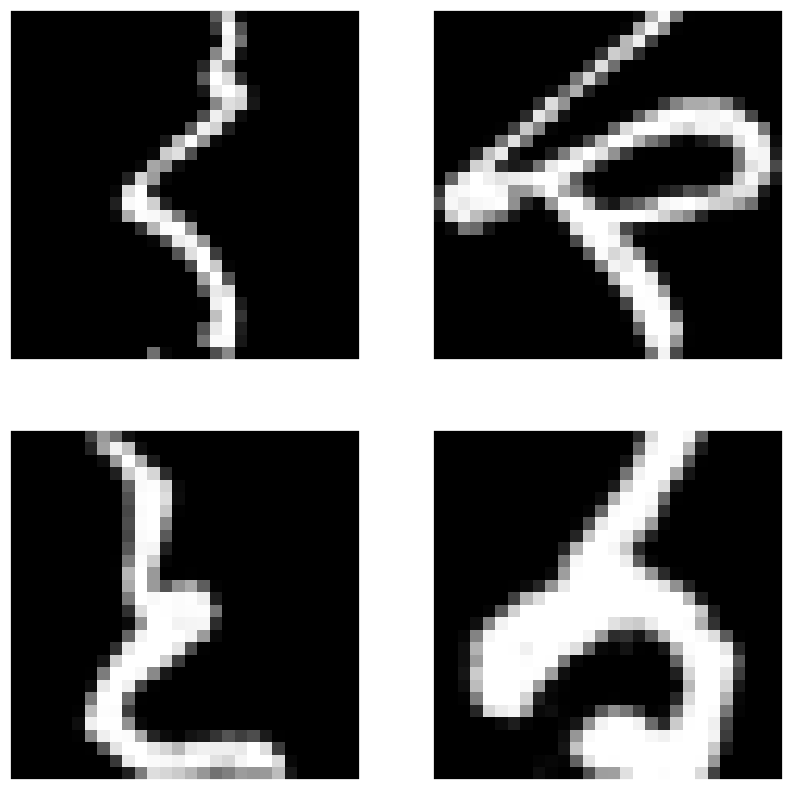

In [14]:
plot_grid(X_train)

## Flattened images
Use Dense layers

In [15]:
# create train and validation datasets, these datasets should use flattened images

x_train = tf.keras.utils.normalize(X_train, axis=1)
x_test = tf.keras.utils.normalize(X_test, axis=1)

print(x_train[0])
# plt.imshow(X_train[0].reshape(28, 28), cmap='gray')

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.01368066
 0.03486362 0.00132393 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.00264787
 0.         0.         0.         0.         0.         0.
 0.         0.         0.00926754 0.08296658 0.02824394 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.0075023  0.         0.
 0.         0.         0.         0.         0.         0.
 0.05604657 0.10414954 0.01323935 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.00132393 0.         0.         0.         0.
 0.         0.         0.         0.    

In [16]:
from keras import layers

# create model, this model should accept a flattened image
print(x_train.shape[1:])
model = tf.keras.models.Sequential([
    layers.InputLayer(input_shape=x_train.shape[1:]),

    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(724, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),

    layers.Dense(49, activation='softmax')
])

# model.add(tf.keras.layers.Flatten())

(784,)


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 724)               186068    
                                                                 
 dense_2 (Dense)             (None, 512)               371200    
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 49)                6

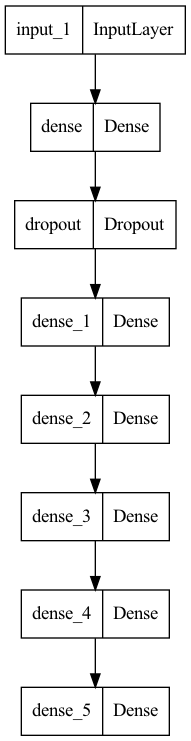

In [18]:
tf.keras.utils.plot_model(model)

In [19]:
logdir = os.path.join('logs/kuzushiji-49/', datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))

In [20]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(logdir, save_best_only=True, monitor='val_loss'),
    tf.keras.callbacks.TensorBoard(logdir, update_freq=10)
]

In [21]:
# compile the model, make sure to add accuracy metric
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [22]:
# train the model, make sure to use callbacks and validation dataset
print(x_train.shape, y_train.shape)

# model.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), class_weight=class_weight_dict)
model.fit(x_train, y_train, epochs=10, validation_split=0.3, class_weight=class_weight_dict)
model.evaluate(x_test, y_test)

(203184, 784) (203184,)
Epoch 1/10
   1/4445 [..............................] - ETA: 12:48 - loss: 3.3352 - accuracy: 0.0312

2023-06-29 17:32:39.337822: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


4445/4445 [==============================] - 14s 3ms/step - loss: 1.3910 - accuracy: 0.6230 - val_loss: 0.8203 - val_accuracy: 0.7726
Epoch 2/10
4445/4445 [==============================] - 13s 3ms/step - loss: 0.7619 - accuracy: 0.7850 - val_loss: 0.5947 - val_accuracy: 0.8307
Epoch 3/10
4445/4445 [==============================] - 13s 3ms/step - loss: 0.6006 - accuracy: 0.8276 - val_loss: 0.5421 - val_accuracy: 0.8503
Epoch 4/10
4445/4445 [==============================] - 13s 3ms/step - loss: 0.5233 - accuracy: 0.8486 - val_loss: 0.4861 - val_accuracy: 0.8661
Epoch 5/10
4445/4445 [==============================] - 14s 3ms/step - loss: 0.4580 - accuracy: 0.8644 - val_loss: 0.4638 - val_accuracy: 0.8725
Epoch 6/10
4445/4445 [==============================] - 13s 3ms/step - loss: 0.4130 - accuracy: 0.8774 - val_loss: 0.4329 - val_accuracy: 0.8833
Epoch 7/10
4445/4445 [==============================] - 13s 3ms/step - loss: 0.3884 - accuracy: 0.8840 - val_loss: 0.4092 - val_accuracy: 0.8

[0.42261916399002075, 0.8922306895256042]

In [23]:
images = X_test.reshape(-1, 28, 28, 1) # normalize if needed
print(images.shape)

(67728, 28, 28, 1)


1/1 [==============================] - 0s 46ms/step


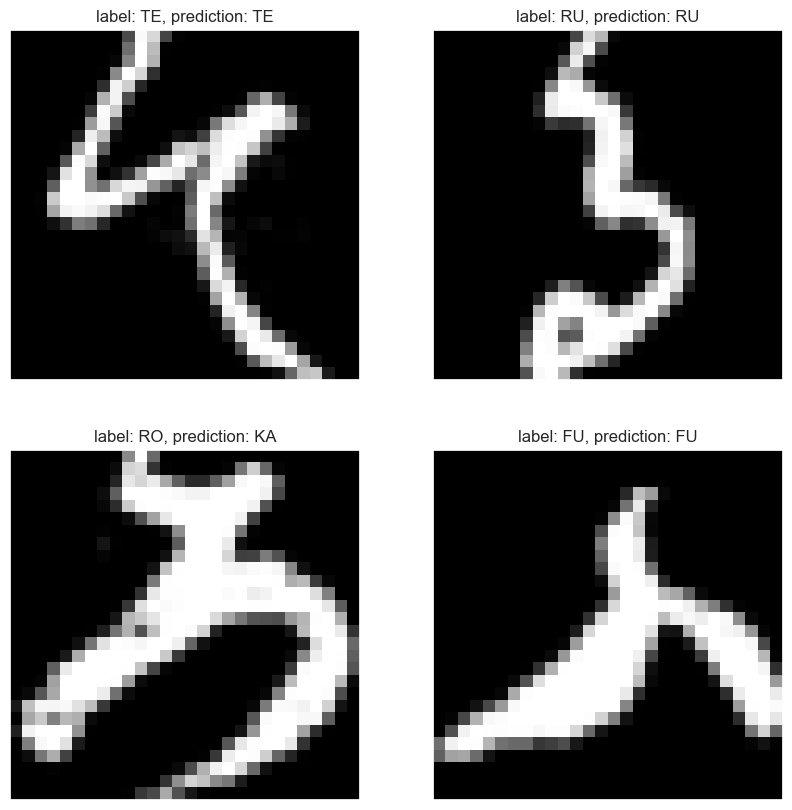

In [24]:
plot_grid_and_label(images, y_test, model, label_description=label_description)

In [25]:
y_pred = model.predict(X_test) # make predictions'
y_pred_labels = np.argmax(y_pred, axis=1)  # select the class label with the highest probability

2117/2117 [==============================] - 2s 784us/step


(67728,)
(67728, 49)


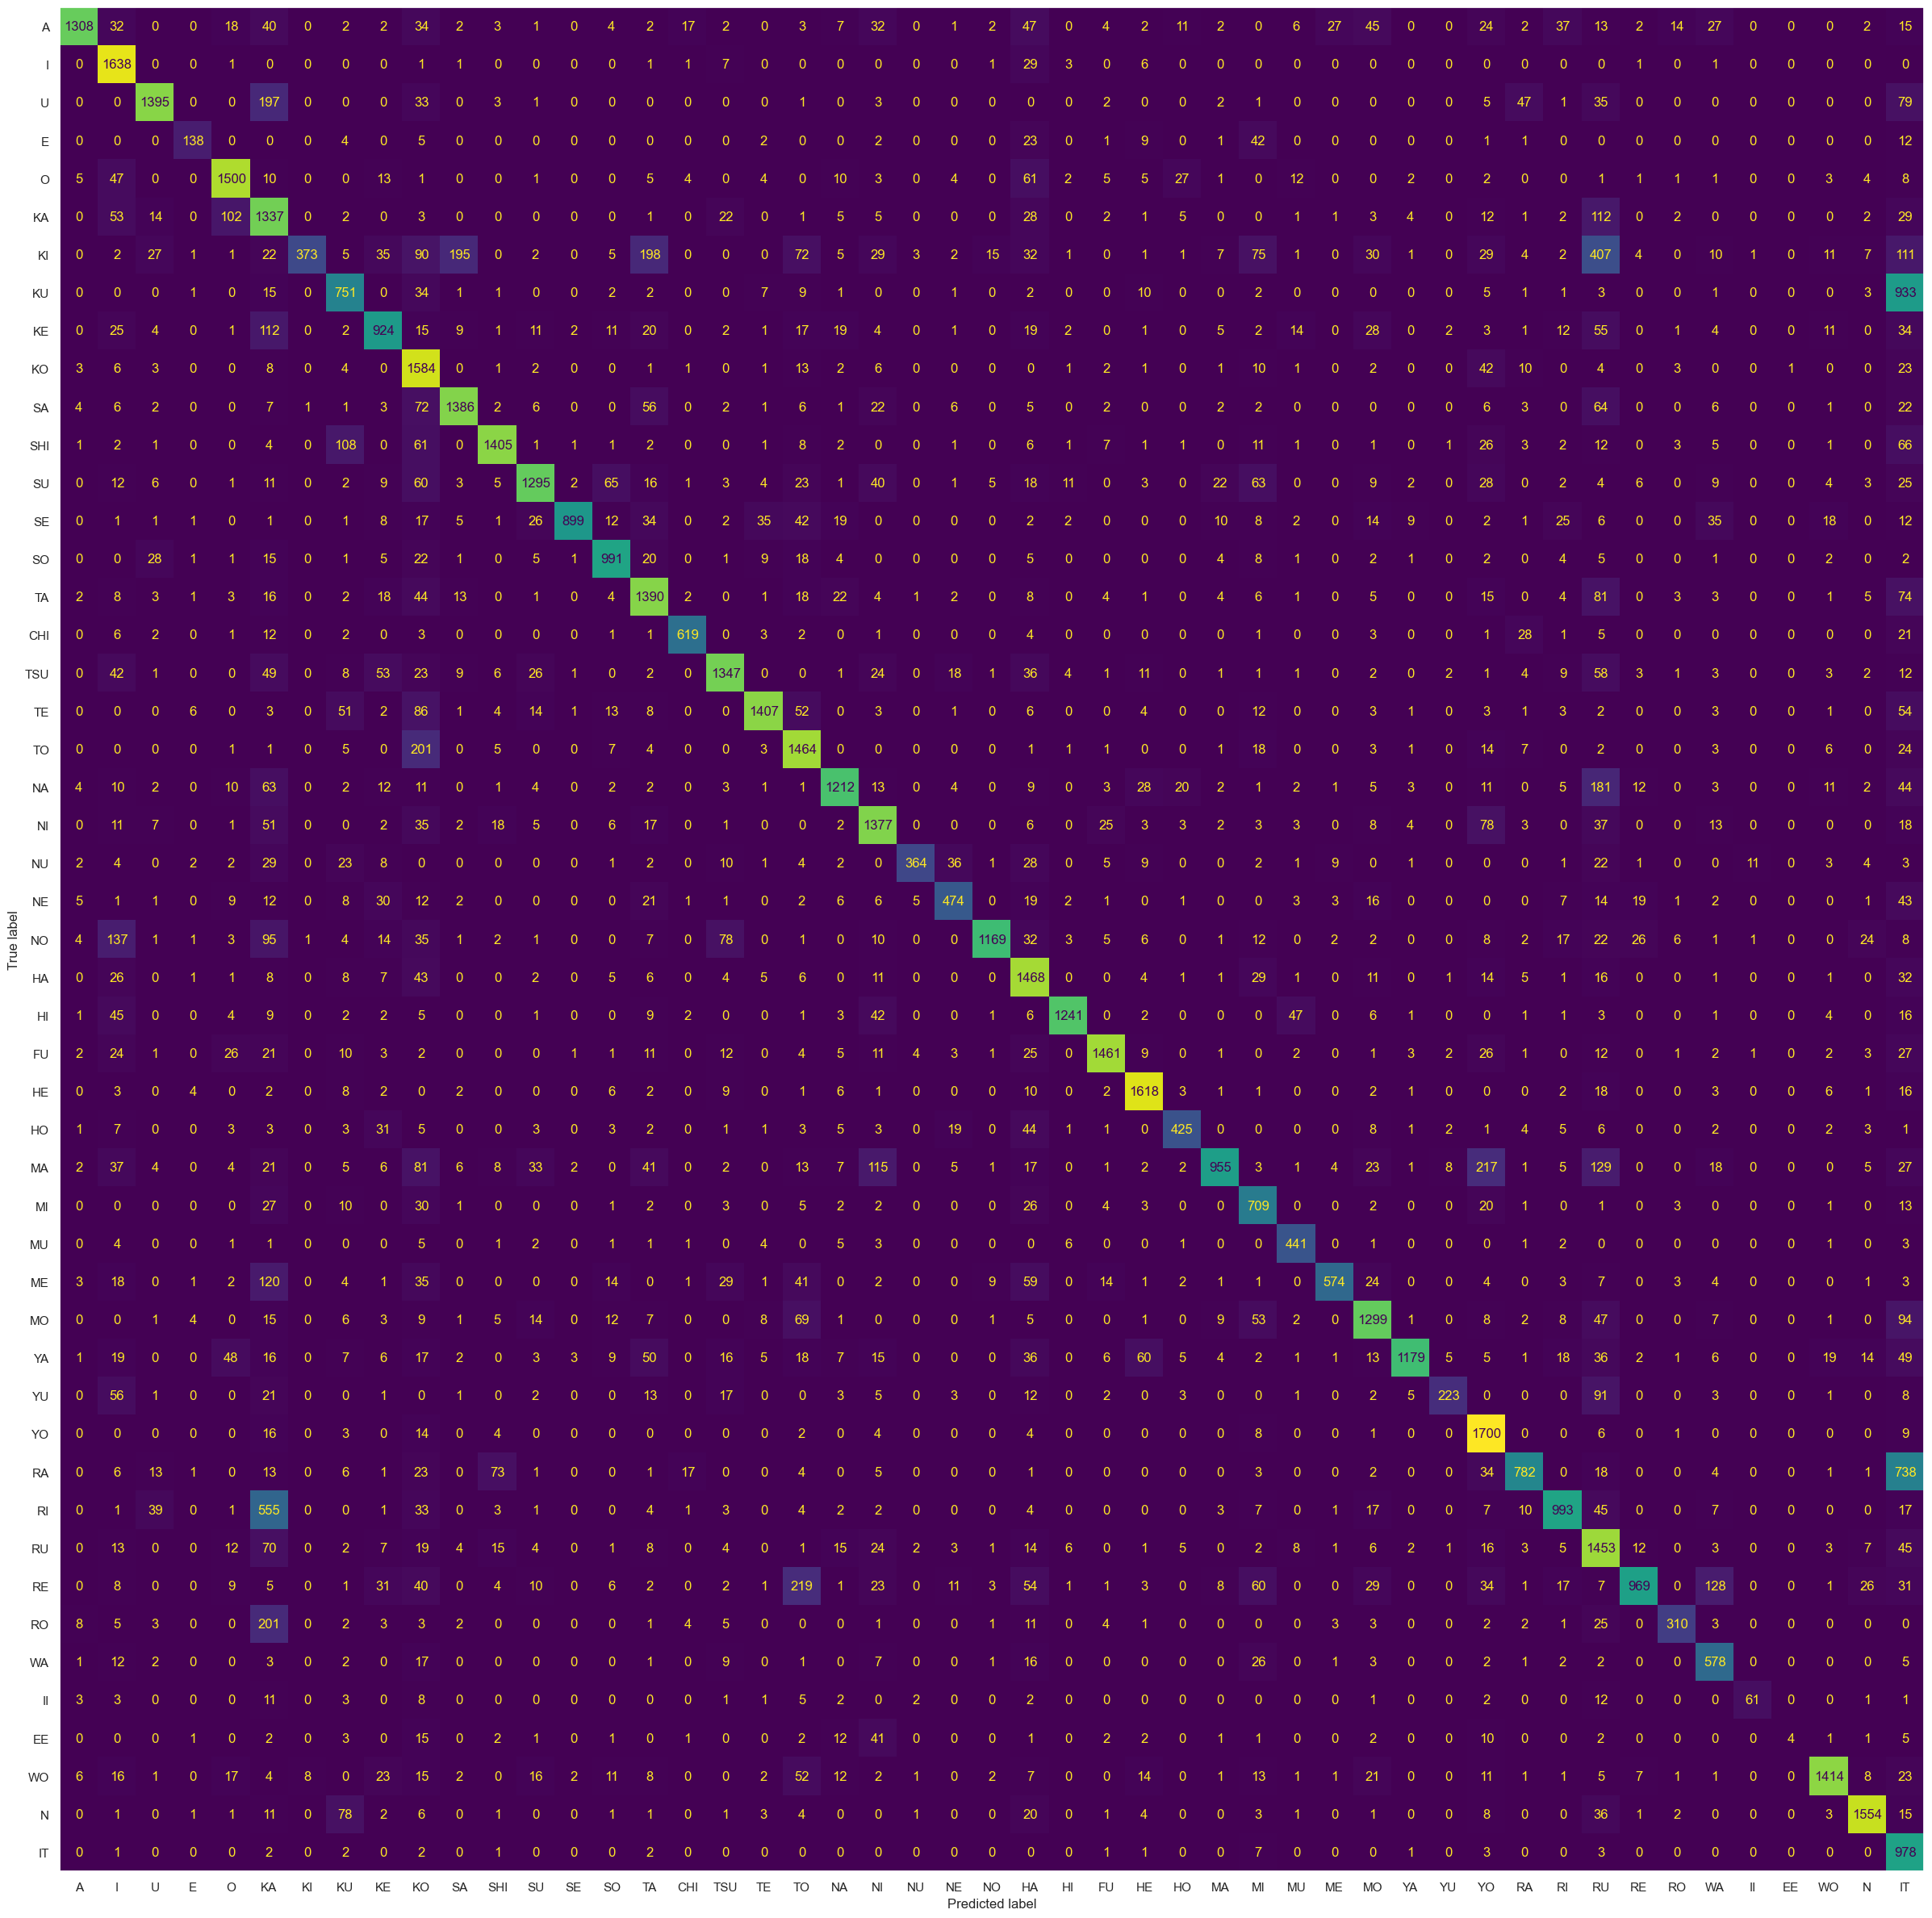

In [26]:
_, ax = plt.subplots(figsize=(30, 30))
print(y_test.shape)
print(y_pred.shape)
sklearn.metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred_labels, display_labels=label_description, ax=ax, colorbar=False)

##### Balanced accuracy

In [27]:
accuracy = y_test == y_pred_labels
np.mean([np.mean(accuracy[y_test == i]) for i in range(49)])

0.7175714710667217

## Actual images
Use Conv2D layers with Dense layer on top

In [28]:
# create train and validation datasets, these datasets should use 28x28x1 images
X, y = sklearn.datasets.fetch_openml('Kuzushiji-49', version=1, return_X_y=True, as_frame=False, parser='auto')
y = np.array(list(map(int, y)))

X.shape

(270912, 784)

In [29]:
X = X.reshape(-1, 28, 28, 1)
X.shape
print(y.shape)
print(X.shape)
# plt.imshow(X[0])

X_train, X_test, y_train, y_test = train_test_split(X, y)

(270912,)
(270912, 28, 28, 1)


In [30]:
# create model, this model should accept a 28x28x1 image
from keras import layers

model = tf.keras.models.Sequential([
    layers.InputLayer(input_shape=(28, 28, 1)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(49, activation='softmax')
])


In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense_6 (Dense)             (None, 256)              

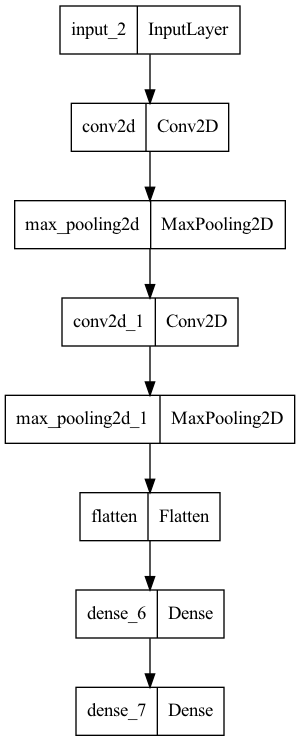

In [32]:
tf.keras.utils.plot_model(model)

In [33]:
logdir = os.path.join('logs/kuzushiji-49/', datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))

In [34]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(logdir, save_best_only=True, monitor='val_loss'),
    tf.keras.callbacks.TensorBoard(logdir, update_freq=10)
]

In [35]:
# compile the model, make sure to add accuracy metric
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# train the model, make sure to use callbacks and validation dataset
print(X_train.shape, y_train.shape)

model.fit(X_train, y_train, epochs=3, batch_size=32, validation_split=0.3, class_weight=class_weight_dict)
model.evaluate(X_test, y_test)

(203184, 28, 28, 1) (203184,)
Epoch 1/3
4445/4445 [==============================] - 53s 12ms/step - loss: 0.7287 - accuracy: 0.8258 - val_loss: 0.3671 - val_accuracy: 0.8992
Epoch 2/3
4445/4445 [==============================] - 47s 10ms/step - loss: 0.3108 - accuracy: 0.9114 - val_loss: 0.4192 - val_accuracy: 0.8855
Epoch 3/3
1550/4445 [=========>....................] - ETA: 25s - loss: 0.2060 - accuracy: 0.9366

In [ ]:
images = X_test.reshape(-1, 28, 28, 1) # normalize if needed

In [ ]:
plot_grid_and_label(images, y_test, model, label_description=label_description, flatten_image=False)

In [ ]:
y_pred = model.predict(X_test) # make predictions
y_pred_labels = np.argmax(y_pred, axis=1)  # select the class label with the highest probability

In [ ]:
_, ax = plt.subplots(figsize=(30, 30))
sklearn.metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred_labels, display_labels=label_description, ax=ax, colorbar=False)

##### Balanced accuracy

In [ ]:
accuracy = y_test == y_pred_labels
np.mean([np.mean(accuracy[y_test == i]) for i in range(49)])